## Lab 08 - Handling Missing Values - Annette Bazan

### Introduction:
- What are missing values?
1. Real-world datasets are rarely clean and homogenous
2. Most of the datasets contain missing values
3. Missing values are the values that are either not collected or non-existent
4. The general term for missing values is NA(Not available)
5. Types of NA(Not available):
   - Null: any piece of data that is not defined
   - None: Any Python object that is missing in a code
   - NaN(Not a number): Which indicates a missing NumPy value
6. The most known missing values are the NaN format.

### Importing Libraries

In [1]:
# General libraries
import pandas as pd
import numpy as np
import math 

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. NONE
a = None
a

In [3]:
type(a)

NoneType

In [4]:
print(a)

None


In [5]:
# Let's use None in a np array
b = np.array([3, None, 5])
b

array([3, None, 5], dtype=object)

In [8]:
# 2. NaN
c= np.array([6, 9, np.NaN, 10])
c

array([ 6.,  9., nan, 10.])

In [9]:
# Using NaN and None in a pandas series
d = pd.Series ([3, None, 5, 'Bazan', np.nan])
d

0        3
1     None
2        5
3    Bazan
4      NaN
dtype: object

### Strategies in Handling Missing Values:
- There are 3 main strategies in handling missing values:
1. Deleting missing values: 3 ways in deleting missing values using the dropna() method:
   - A) dropna(): with no parameters: deleting every missing value in the dataset.
   - B) dropna(axis=0): deleting every row with missing values.
   - C) dropna(axis=1): deleting every column with missing values.
2. Imputing missing values: filling either numeric missing values or non-numeric missing values:
   - A) numeric: fillna() with either mean() or median().
If we have outliers in a variable, it is safer to fill missing values with the median() of the variable since the median() is less sensitive to the outliers.
   - B) non-numeric missing values: we can fill the missing values with the most frequent values or 'no info'.
3. Using a model: The most popular models in filling the missing values are regression or KNN. However, filling the missing values with a model can result in the model to be overfit.

### Loading the Dataset

In [10]:
# Let's load the dataset
df = pd.read_csv('titanic.csv')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Let's copy the dataset
titanic = df.copy()

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Shape attribute
titanic.shape

(891, 12)

In [14]:
# Info method
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# Statistical summary: only for numeric variables
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#summary of the object variables
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [18]:
# Let's check the missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Strategy #1: Deleting missing values:**

In [19]:
titanic1 = titanic.copy()

In [24]:
# Deleting every missing value in the dataset
titanic1.dropna(inplace=True)

In [25]:
titanic1.shape

(183, 12)

In [27]:
titanic2 = titanic.copy()

In [30]:
# Let's delete only the rows with missing values
titanic2.dropna(axis=0, inplace=True)

In [31]:
titanic2.shape

(183, 12)

In [32]:
titanic3 = titanic.copy()

In [33]:
# Let's delete only the columns that contain missing values
titanic3.dropna(axis=1, inplace=True)

In [34]:
titanic3.shape

(891, 9)

In [35]:
titanic3.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


**Strategy for dropping a column with missing values:**
- if a column contains more than 65% missing values
- and it is **NOT** a critical variable
- and it does **NOT** make any difference in the model performance
- we can drop that column.

In [36]:
# Let's check the percentage of missing values in each column
titanic.isnull().sum() * 100 /len(titanic)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Dropping a column with more than 65% missing values:
- The "Cabin" variable in this dataset has 77% of missing values
-  It doesn't affect the performance of the model in the rate of passenger's survival.

In [37]:
# Let's drop the Cabin column
titanic4 = titanic.copy()

In [38]:
titanic4.drop('Cabin', axis=1, inplace=True)

In [39]:
titanic4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Strategy #2: Inputing missing values:**
1. numeric values: either mean() or median()

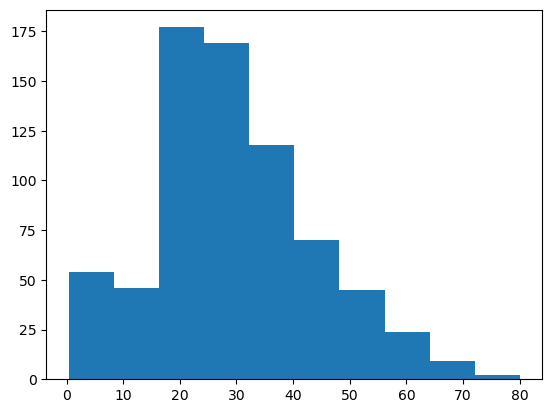

In [40]:
# Let's check the 'Age' variable for outliers
plt.hist(titanic4['Age']);

In [41]:
# 1. Let's fill the missing values with median()
titanic4['Age'] = titanic4['Age'].fillna(titanic4['Age'].median())

In [42]:
titanic4.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

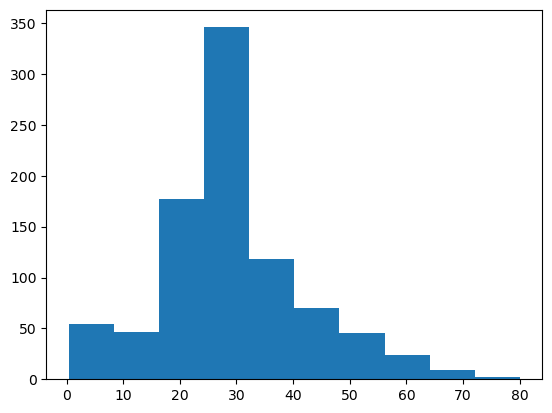

In [43]:
plt.hist(titanic4['Age']);

In [44]:
# Let's fill the missing values with mean()
titanic4['Age'] = titanic4['Age'].fillna(titanic4['Age'].mean())

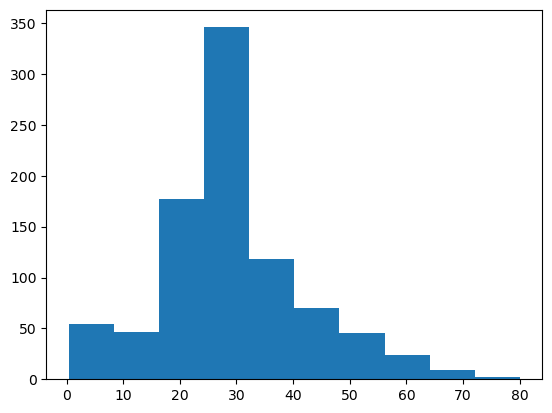

In [45]:
plt.hist(titanic4['Age']);

**Observations:**
- Since the Age variable does not have any outliers, filling the missing values with median() or mean() is not affecting the data distrubution after imputing the missing values.

In [46]:
titanic4.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [47]:
# Let's examine 'Embarked' variable with missing values:
# 1. Embarked is a categorical variable
titanic4['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [48]:
# Impute the 2 missing values with the most frequent value which is S
titanic4['Embarked'].fillna('S', inplace=True)

In [49]:
titanic4.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64